<a href="https://colab.research.google.com/github/joData-21/soal2/blob/main/TestGEEColab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!pip install ee
#!pip install xkcd

  Created wheel for xkcd: filename=xkcd-2.4.2-py3-none-any.whl size=9195 sha256=5dd6a6492c9774cd47b7d086cbcb81c7b79f220cc8602931538b22b5e6e58992
  Stored in directory: /root/.cache/pip/wheels/ba/62/74/4808cbf8cf843406a45b1671e9da7ed7beb13dfcb24938745d
Successfully built xkcd


In [1]:
import ee
import folium

In [10]:
import xkcd
from IPython.display import HTML
from IPython.display import Image

In [11]:
comic = xkcd.getRandomComic()
comic

Comic object for https://www.xkcd.com/1296

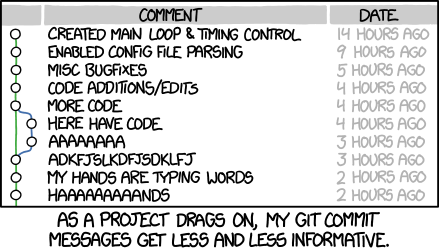

In [12]:
Image(comic.getImageLink())

In [14]:
from IPython.display import IFrame
from IPython.display import HTML

google_slides_URL =  "https://docs.google.com/presentation/d/e/2PACX-1vQiVxi1IywSVdk8-zmbjz3MiKe_hX8jAryEVIN2kJKUUKTxgWZUIKev57m6H1-UoXO5V49RQLWD4pbm/embed?slide=id.g96bfef2eea_0_18"
display(
    IFrame(src=google_slides_URL, 
               width=800, 
               height=500),
    HTML('''<a href="{0}" target="_blank">Here is a link to open the slides in a new tab.</a>
         '''.format(google_slides_URL))
)

In [2]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=WfjVvjDBPDnzUhzBUeQEHp1d1aVki-ZaOFPLeTzFH00&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWiRtKrWfHZ1kaEkKrKFkJ9FD0P_Z4rG98b84Bhvr025FS5MhcFk7gQ

Successfully saved authorization token.


In [3]:
ee.Initialize()

In [4]:
dem = ee.Image('USGS/SRTMGL1_003')

In [5]:
print(dem)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.load",
    "arguments": {
      "id": {
        "constantValue": "USGS/SRTMGL1_003"
      }
    }
  }
})


In [13]:
vis_dem = {
    'bands': 'elevation',
    'min' : 0,
    'max': 4000,
    'palette' : ['006633','E5FFCC','662A00','DBDBDB','F5F5F5']
}

rgb = dem.visualize(**vis_dem)

Image(url=rgb.getThumbURL({'dimensions': 512}))

In [15]:
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

In [16]:
# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_dem, 'DEM')

# Display the map in the notebook.
display(my_map)